In [8]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd



In [12]:
imgs_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5  # number of most similar images to retrieve




In [13]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

In [11]:
processed_files = []
importedImages = []
batch_size = 32  
imgs_features_list = []  # List to accumulate features for each batch

for type_folder in os.listdir(imgs_path):
    type_path = os.path.join(imgs_path, type_folder)

    for model_folder in os.listdir(type_path):
        model_path = os.path.join(type_path, model_folder)

        for brand_folder in os.listdir(model_path):
            brand_path = os.path.join(model_path, brand_folder)

            for img_file in os.listdir(brand_path):
                filename = os.path.join(brand_path, img_file)
                original = load_img(filename, target_size=(224, 224))
                numpy_image = img_to_array(original)
                image_batch = np.expand_dims(numpy_image, axis=0)
                importedImages.append(image_batch)

                # Process images in batches
                if len(importedImages) == batch_size:
                    batch = np.vstack(importedImages)
                    processed_batch = preprocess_input(batch.copy())
                    
                    
                    # Extract and accumulate features for the current batch
                    batch_features = feat_extractor.predict(processed_batch)
                    imgs_features_list.append(batch_features)

                    importedImages = []

# Process the remaining images in the last batch
if importedImages:
    batch = np.vstack(importedImages)
    processed_batch = preprocess_input(batch.copy())
    
    
    # Extract and accumulate features for the last batch
    batch_features = feat_extractor.predict(processed_batch)
    imgs_features_list.append(batch_features)

    importedImages = []

# Concatenate features for all batches
imgs_features = np.vstack(imgs_features_list)

print("Features successfully extracted!")



1/1 [==============================] - 2s 2s/step
Features successfully extracted!


In [14]:
len(imgs_features)

50066

In [15]:
# Compute cosine similarities between images
cosSimilarities = cosine_similarity(imgs_features)


In [18]:
cosSimilarities.shape

(50066, 50066)

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os

# Specify the path to your images directory
imgs_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square"

# Initialize a list to store file paths
file_paths = []

# Loop through the image directory and collect all file paths
for type_folder in os.listdir(imgs_path):
    for model_folder in os.listdir(os.path.join(imgs_path, type_folder)):
        for brand_folder in os.listdir(os.path.join(imgs_path, type_folder, model_folder)):
            for file_name in os.listdir(os.path.join(imgs_path, type_folder, model_folder, brand_folder)):
                file_path = os.path.join(imgs_path, type_folder, model_folder, brand_folder, file_name)
                file_paths.append(file_path.replace('/', '\\\\'))  # Replace forward slashes with double backward slashes

# Compute cosine similarities between all images
cos_similarities = cosine_similarity(imgs_features)

# Store the results into a pandas dataframe with file paths as indices
cos_similarities_df = pd.DataFrame(cos_similarities, columns=file_paths, index=file_paths)

# Print the dataframe
print(cos_similarities_df)


                                                    C:\Users\arava\OneDrive\Documents\Purdue\ut-zap50k-images-square\Boots\Ankle\A. Testoni\7965307.5291.jpg  \
C:\Users\arava\OneDrive\Documents\Purdue\ut-zap...                                           1.000000                                                          
C:\Users\arava\OneDrive\Documents\Purdue\ut-zap...                                           0.743547                                                          
C:\Users\arava\OneDrive\Documents\Purdue\ut-zap...                                           0.738789                                                          
C:\Users\arava\OneDrive\Documents\Purdue\ut-zap...                                           0.622616                                                          
C:\Users\arava\OneDrive\Documents\Purdue\ut-zap...                                           0.487979                                                          
...                                     

In [1]:
cos_similarities_df.head()

NameError: name 'cos_similarities_df' is not defined

-----------------------------------------------------------------------
Original product:


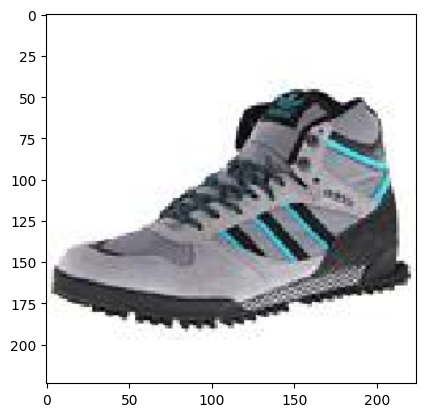

-----------------------------------------------------------------------
Most similar products:


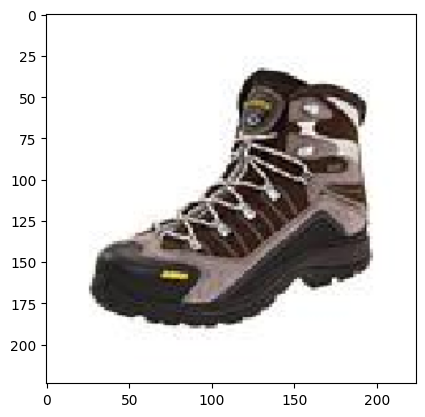

Similarity score: 0.819651


C:\Users\arava\AppData\Local\Temp\ipykernel_14752\356025463.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Similarity score:", closest_imgs_scores[i])


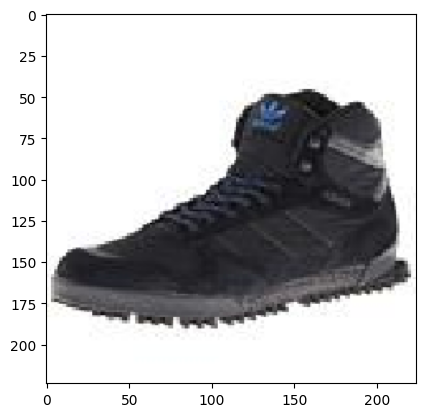

Similarity score: 0.80965126


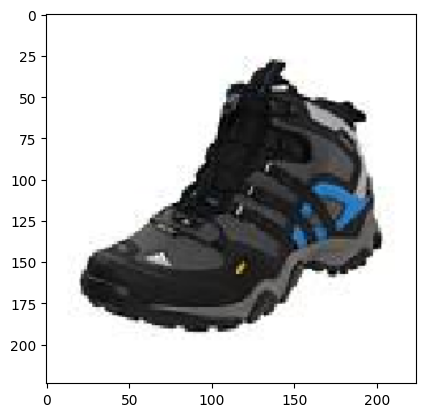

Similarity score: 0.7861597


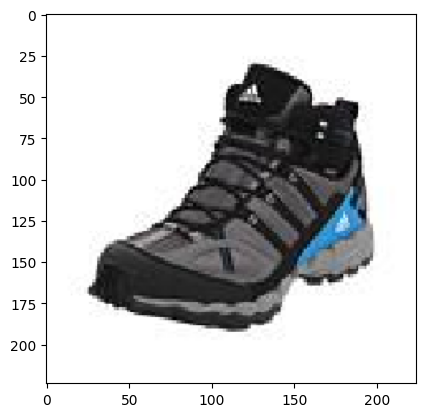

Similarity score: 0.7831464


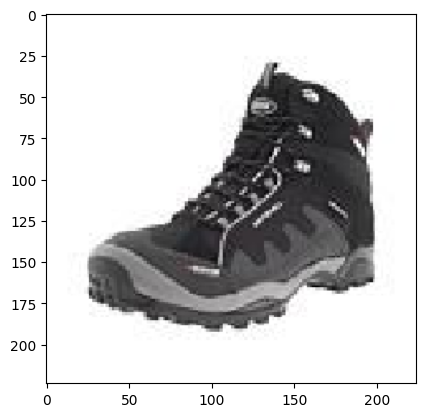

Similarity score: 0.77981937


In [24]:
# Function to retrieve the most similar products for a given one
def retrieve_most_similar_products(given_img):
    print("-----------------------------------------------------------------------")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for i in range(len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Similarity score:", closest_imgs_scores[i])

# Example: Retrieve similar products for a given image
given_image_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square\\Boots\\Ankle\\adidas Originals\\8027274.372160.jpg"
retrieve_most_similar_products(given_image_path)

-----------------------------------------------------------------------
Original product:


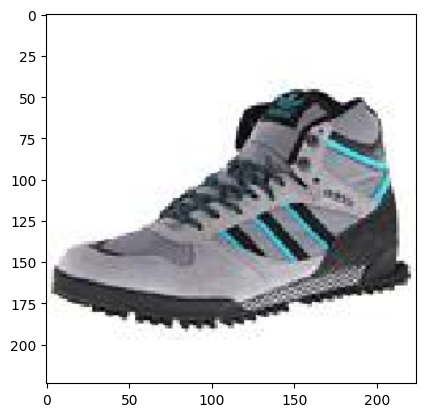

-----------------------------------------------------------------------
Most similar products:


C:\Users\arava\AppData\Local\Temp\ipykernel_14752\3371567581.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  similarity_score = closest_imgs_scores[i]


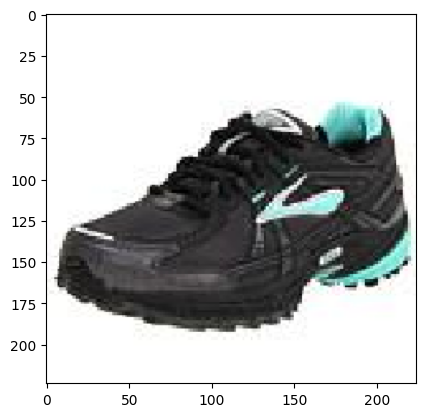

Similarity score: 0.86299


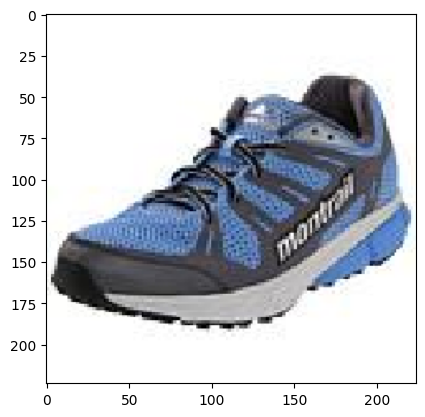

Similarity score: 0.85345507


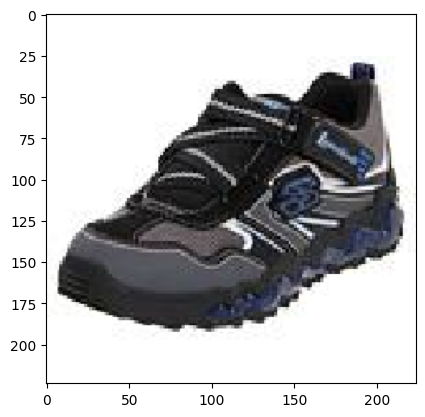

Similarity score: 0.8514577


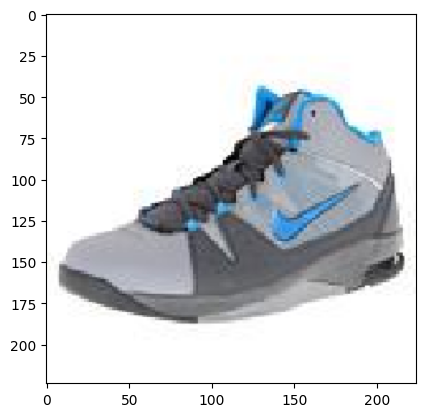

Similarity score: 0.85105085


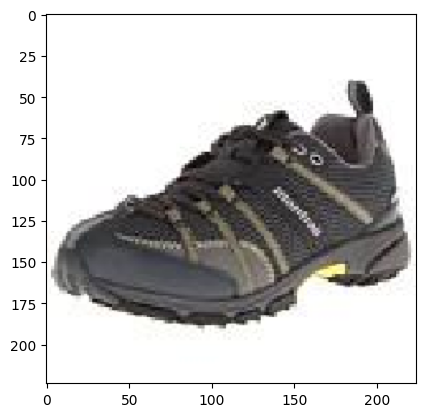

Similarity score: 0.85046196


In [29]:
# Function to retrieve the most similar products for a given one
def retrieve_most_similar_products(given_img, nb_closest_images=5):
    print("-----------------------------------------------------------------------")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for i in range(len(closest_imgs)):
        similar_img_path = closest_imgs[i]
        similarity_score = closest_imgs_scores[i]

        # Load and display the similar product
        similar_img = load_img(similar_img_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(similar_img)
        plt.show()

        print("Similarity score:", similarity_score)

# Example: Retrieve similar products for a given image
given_image_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square\\Boots\\Ankle\\adidas Originals\\8027274.372160.jpg"
retrieve_most_similar_products(given_image_path)


-----------------------------------------------------------------------
Original product:


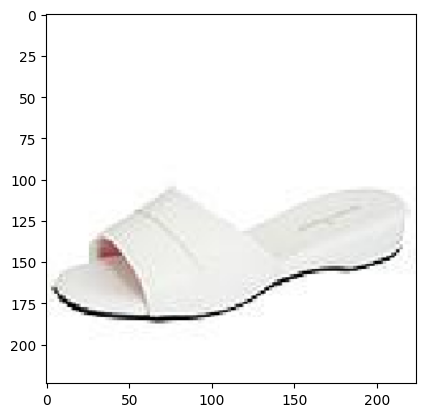

-----------------------------------------------------------------------
Most similar products:


C:\Users\arava\AppData\Local\Temp\ipykernel_14752\466266138.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  similarity_score = closest_imgs_scores[i]


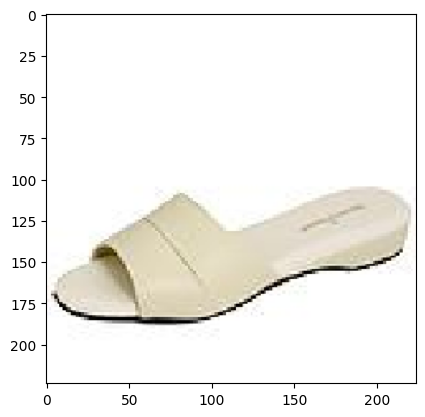

Similarity score: 0.9107975


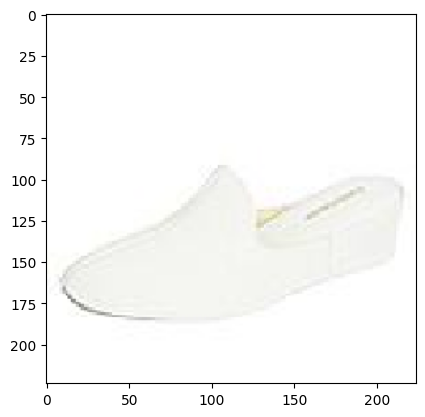

Similarity score: 0.8415017


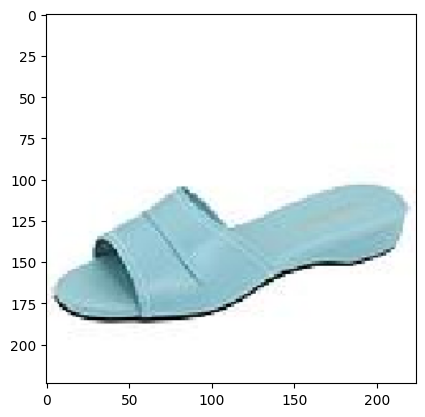

Similarity score: 0.81760764


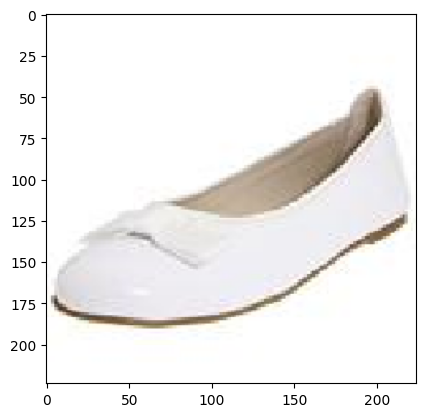

Similarity score: 0.8005481


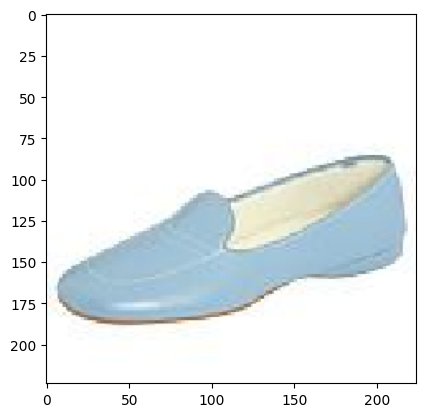

Similarity score: 0.7913707


In [30]:
# Function to retrieve the most similar products for a given one
def retrieve_most_similar_products(given_img, nb_closest_images=5):
    print("-----------------------------------------------------------------------")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for i in range(len(closest_imgs)):
        similar_img_path = closest_imgs[i]
        similarity_score = closest_imgs_scores[i]

        # Load and display the similar product
        similar_img = load_img(similar_img_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(similar_img)
        plt.show()

        print("Similarity score:", similarity_score)

# Example: Retrieve similar products for a given image
given_image_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square\\Slippers\\Slipper Heels\\Daniel Green\\105772.14.jpg"
retrieve_most_similar_products(given_image_path)

-----------------------------------------------------------------------
Original product:


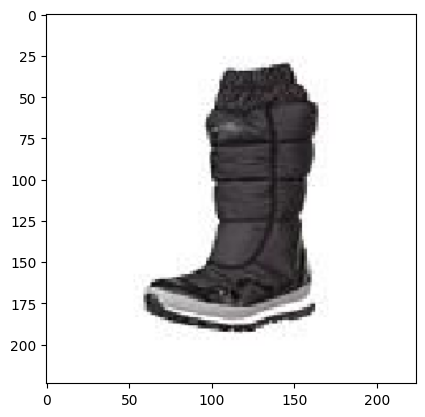

-----------------------------------------------------------------------
Most similar products:


C:\Users\arava\AppData\Local\Temp\ipykernel_14752\119690666.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  similarity_score = closest_imgs_scores[i]


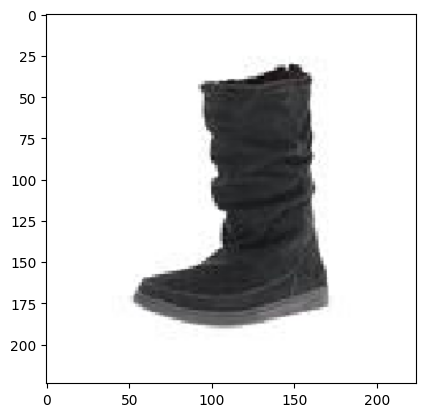

Similarity score: 0.8844114


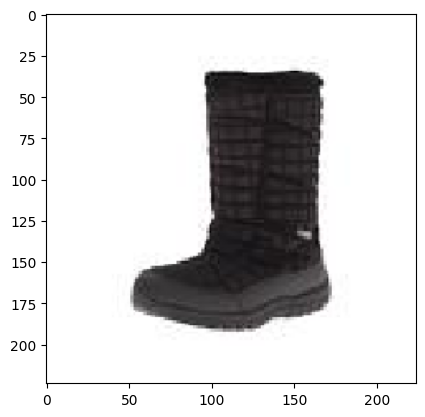

Similarity score: 0.8611735


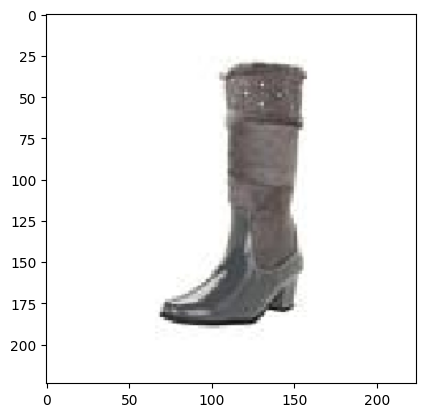

Similarity score: 0.86110526


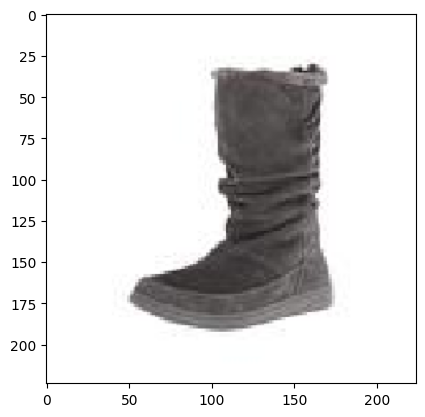

Similarity score: 0.8602848


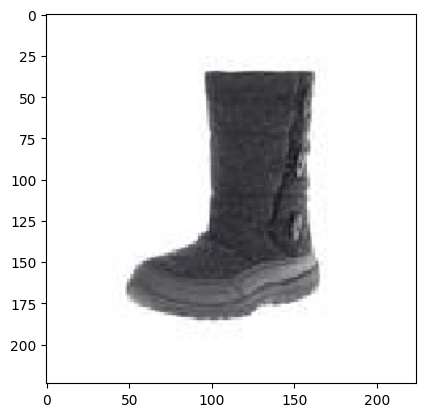

Similarity score: 0.8576843


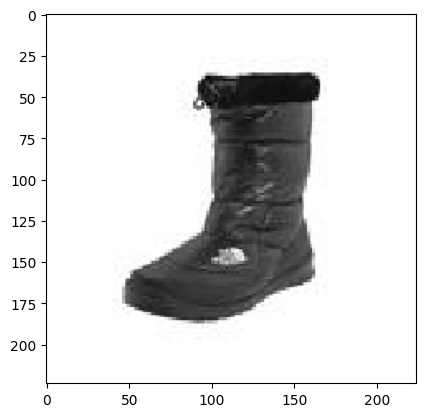

Similarity score: 0.8518384


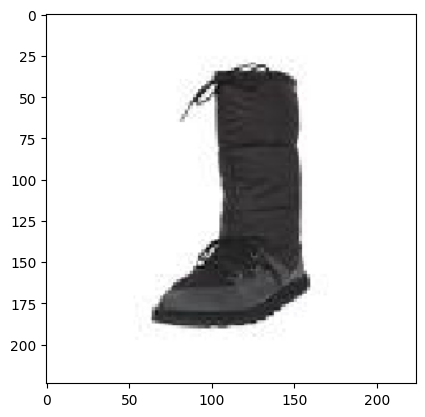

Similarity score: 0.8515393


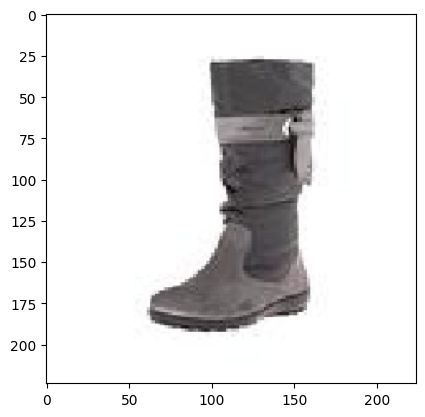

Similarity score: 0.84833443


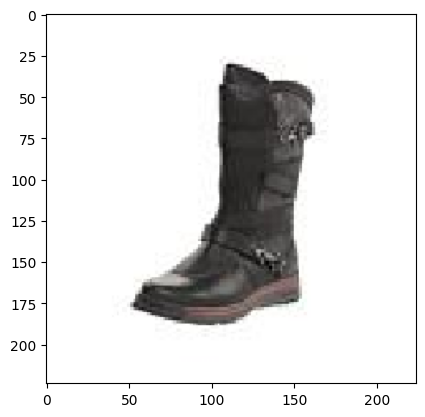

Similarity score: 0.8452412


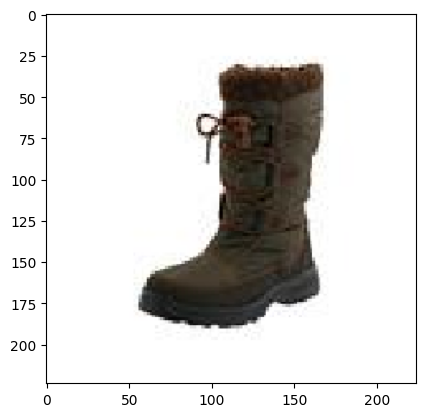

Similarity score: 0.8411783


In [31]:
# Function to retrieve the most similar products for a given one
def retrieve_most_similar_products(given_img, nb_closest_images=10):
    print("-----------------------------------------------------------------------")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for i in range(len(closest_imgs)):
        similar_img_path = closest_imgs[i]
        similarity_score = closest_imgs_scores[i]

        # Load and display the similar product
        similar_img = load_img(similar_img_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(similar_img)
        plt.show()

        print("Similarity score:", similarity_score)

# Example: Retrieve similar products for a given image
given_image_path = "C:\\Users\\arava\\OneDrive\\Documents\\Purdue\\ut-zap50k-images-square\\Boots\\Mid-Calf\\adidas by Stella McCartney\\8003655.139.jpg"
retrieve_most_similar_products(given_image_path)